# Inferential Statistics Project - Supporting File
Author: Krishnan CS

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [3]:
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Problem 1

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected. This data will be represented in a Pandas DataFrame

In [4]:
# Create empty dataframe with the specified columns and row indices
df_foot = pd.DataFrame(data={},index=['Players Injured', 'Players Not Injured','Total'],columns=['Striker','Forward','Attacking Midfielder','Winger','Total'])

In [5]:
# Fill data into dataframe
df_foot['Striker'] = [45,32,77]
df_foot['Forward'] = [56,38,94]
df_foot['Attacking Midfielder'] = [24,11,35]
df_foot['Winger'] = [20,9,29]
df_foot['Total'] = [145,90,235]

In [6]:
# Check the data
df_foot

,Striker,Forward,Attacking Midfielder,Winger,Total
Players Injured,45,56,24,20,145
Players Not Injured,32,38,11,9,90
Total,77,94,35,29,235


## 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [7]:
print ('Probability that a randomly chosen player would suffer an injury is', round(df_foot.loc['Players Injured','Total'] / df_foot.loc['Total','Total'],4))

Probability that a randomly chosen player would suffer an injury is 0.617


## 1.2 What is the probability that a player is a forward or a winger?

In [8]:
print ('Probability that a player is a forward or a winger is', round((df_foot.loc['Total','Forward'] + df_foot.loc['Total','Winger']) / df_foot.loc['Total','Total'],4))

Probability that a player is a forward or a winger is 0.5234


## 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [9]:
print ('Probability that a randomly chosen player plays in a striker position and has a foot injury is', round(df_foot.loc['Players Injured','Striker'] / df_foot.loc['Total','Total'], 4))

Probability that a randomly chosen player plays in a striker position and has a foot injury is 0.1915


## 1.4 What is the probability that a randomly chosen injured player is a striker?

In [10]:
print ('Probability that a randomly chosen injured player is a striker is', round(df_foot.loc['Players Injured','Striker'] / df_foot.loc['Players Injured','Total'],4))

Probability that a randomly chosen injured player is a striker is 0.3103


# Problem 2

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain.

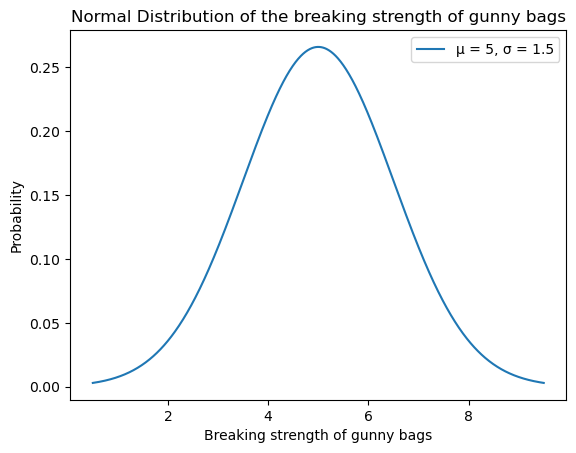

In [11]:
# Create a normal distribution with a mean of 5 and standard deviation of 1.5 using random data
mu_bags = 5
sigma_bags = 1.5
x_bags = np.linspace(mu_bags - 3 * sigma_bags, mu_bags + 3 * sigma_bags, 1000)
normBags = norm.pdf(x_bags, mu_bags, sigma_bags)

# Plot the normal distribution 
plt.plot(x_bags, normBags, label=f'μ = {mu_bags}, σ = {sigma_bags}') 
# Add title and labels 
plt.title('Normal Distribution of the breaking strength of gunny bags') 
plt.xlabel('Breaking strength of gunny bags') 
plt.ylabel('Probability') 
plt.legend()
plt.show()

## 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

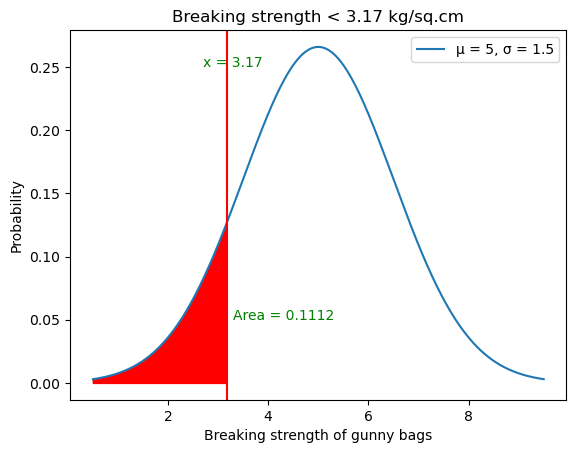

In [12]:
# Plot the normal distribution 
plt.plot(x_bags, normBags, label=f'μ = {mu_bags}, σ = {sigma_bags}') 
# Add title and labels 
plt.title('Breaking strength < 3.17 kg/sq.cm') 
plt.xlabel('Breaking strength of gunny bags') 
plt.ylabel('Probability')
plt.axvline(x=3.17, c="r") # draw a red vertical line at x = 3.17
plt.text(x=2.7, y=0.25, s='x = 3.17',c='g')
x1 = np.linspace(mu_bags - 3 * sigma_bags, 3.17, 50) # create an array of 50 numbers between min and 3.17
plt.fill_between(x1, norm.pdf(x1, mu_bags, sigma_bags), color="r") # fill the specified region with red color
plt.text(x=3.3,y=0.05, s='Area = 0.1112',c='g')
plt.legend() 
plt.show()

In [13]:
print('Proportion of gunny bags having a breaking strength of less than 3.17 kg per sq cm is', round( norm.cdf(3.17, mu_bags, sigma_bags) ,4) )

Proportion of gunny bags having a breaking strength of less than 3.17 kg per sq cm is 0.1112


## 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

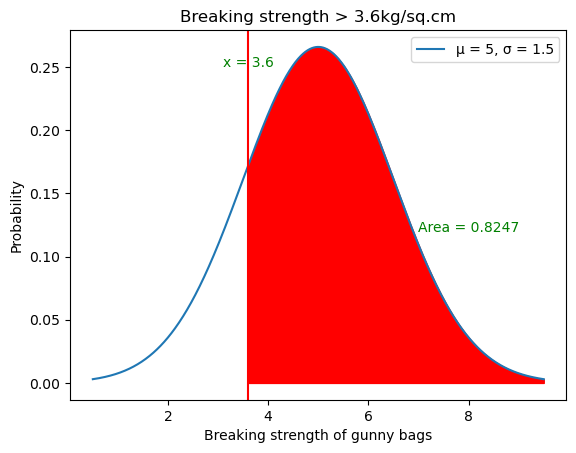

In [14]:
# Plot the normal distribution 
plt.plot(x_bags, normBags, label=f'μ = {mu_bags}, σ = {sigma_bags}') 
# Add title and labels
plt.title('Breaking strength > 3.6kg/sq.cm') 
plt.xlabel('Breaking strength of gunny bags') 
plt.ylabel('Probability')
plt.axvline(x=3.6, c="r") # draw a red vertical line at x = 3.6
plt.text(x=3.1, y=0.25, s='x = 3.6',c='g')
x1 = np.linspace(3.6, mu_bags + 3 * sigma_bags, 50) # create an array of 50 numbers between 3.6 and max
plt.fill_between(x1, norm.pdf(x1, mu_bags, sigma_bags), color="r") # fill the specified region with red color
plt.text(x=7,y=0.12, s='Area = 0.8247',c='g')

plt.legend() 
plt.show()

In [15]:
print('Proportion of gunny bags having a breaking strength of at least 3.6 kg per sq cm is', round( 1 - norm.cdf(3.6, mu_bags, sigma_bags) ,4) )

Proportion of gunny bags having a breaking strength of at least 3.6 kg per sq cm is 0.8247


## 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

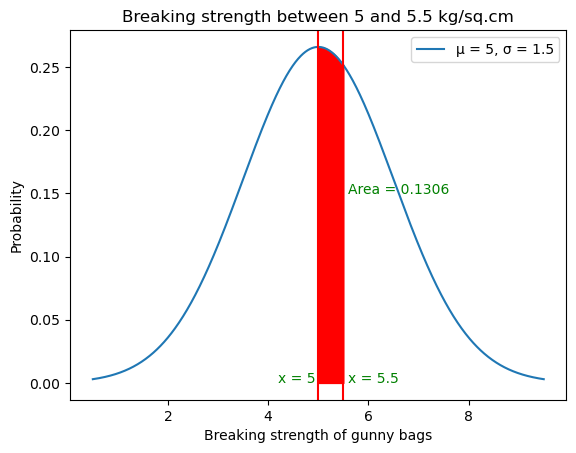

In [16]:
# Plot the normal distribution 
plt.plot(x_bags, normBags, label=f'μ = {mu_bags}, σ = {sigma_bags}') 
# Add title and labels 
plt.title('Breaking strength between 5 and 5.5 kg/sq.cm') 
plt.xlabel('Breaking strength of gunny bags') 
plt.ylabel('Probability')
plt.axvline(x=5, c="r") # draw a red vertical line at x = 5
plt.axvline(x=5.5, c="r") # draw a red vertical line at x = 5.5
x1 = np.linspace(5, 5.5, 50) # create an array of 50 numbers between min to 5 and 5.5
plt.fill_between(x1, norm.pdf(x1, mu_bags, sigma_bags), color="r") # fill the specified region with red color
plt.text(x=4.2, y=0, s='x = 5',c='g')
plt.text(x=5.6, y=0, s='x = 5.5',c='g')
plt.text(x=5.6,y=0.15, s='Area = 0.1306',c='g')

plt.legend() 
plt.show()

In [17]:
print('Proportion of gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is', round( norm.cdf(5.5, mu_bags, sigma_bags) - norm.cdf(5, mu_bags, sigma_bags) ,4) )

Proportion of gunny bags having a breaking strength between 5 and 5.5 kg per sq cm is 0.1306


## 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

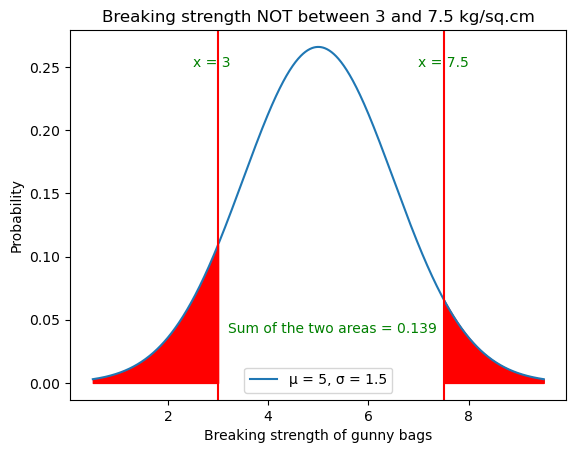

In [18]:
# Plot the normal distribution 
plt.plot(x_bags, normBags, label=f'μ = {mu_bags}, σ = {sigma_bags}') 
# Add title and labels 
plt.title('Breaking strength NOT between 3 and 7.5 kg/sq.cm') 
plt.xlabel('Breaking strength of gunny bags') 
plt.ylabel('Probability')
plt.axvline(x=3, c="r") # draw a red vertical line at x = 3
x1 = np.linspace(mu_bags - 3 * sigma_bags, 3, 50) # create an array of 50 numbers between min and 3
plt.fill_between(x1, norm.pdf(x1, mu_bags, sigma_bags), color="r") # fill the specified region with red color
plt.text(x=2.5, y=0.25, s='x = 3',c='g')

plt.axvline(x=7.5, c="r") # draw a red vertical line at x = 7.5
x2 = np.linspace(7.5, mu_bags + 3 * sigma_bags, 50) # create an array of 50 numbers between 7.5 and max
plt.fill_between(x2, norm.pdf(x2, mu_bags, sigma_bags), color="r") # fill the specified region with red color
plt.text(x=7, y=0.25, s='x = 7.5',c='g')
plt.text(x=3.2, y=0.04,s='Sum of the two areas = 0.139',c='g')
plt.legend() 
plt.show()

In [19]:
print('Proportion of gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is', round( norm.cdf(3, mu_bags, sigma_bags) + 1 - norm.cdf(7.5, mu_bags, sigma_bags) ,4) )

Proportion of gunny bags having a breaking strength NOT between 3 and 7.5 kg per sq cm is 0.139


# Problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. The data will be analyzed assuming a 5% significance level

## Read the data and get an overview

In [20]:
# Read the data
df_stones = pd.read_csv('Zingaro_Company.csv')

In [21]:
# Check if the data is loaded
df_stones.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [22]:
# Check the dataset
df_stones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [23]:
# The dataframe has numerical columns. We can check the mean, median and other parameters
df_stones.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [24]:
# Remove the extra white space in the Unpolished column
df_stones.columns = df_stones.columns.str.strip()

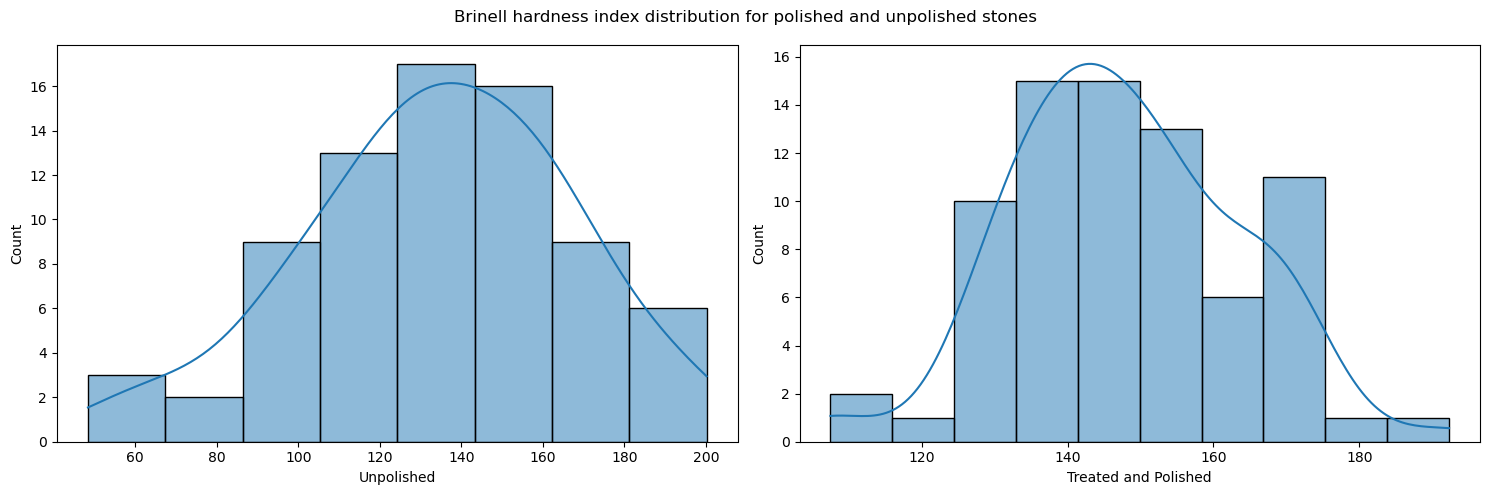

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(df_stones['Unpolished'], kde=True,ax=ax[0])
sns.histplot(df_stones['Treated and Polished'], kde=True,ax=ax[1])
fig.suptitle('Brinell hardness index distribution for polished and unpolished stones')
plt.tight_layout()
plt.show()

## 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

For the business problem, let us start with the null and alternate hypothesis. Here Zingaro believes that the unpolished stones may not be suitable for printing. The parameter that can be tested here is the Brinell hardness. For optimal level of printing, the Brinell hardness of the stones need to be at least 150. Based on this data,

> Null hypothesis $H_0$: $\mu$ >= 150

> Alternate hypothesis $H_a$: $\mu$ < 150

### Test selection 

Since we would be testing 1 sample with an unknown population standard deviation, 1 sample t-test looks like a good choice. Before proceeding to the test, let us test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the delivery time is measured on a continuous scale.

* Normal distribution - Yes, since sample size > 30 the distribution would be normal as per Central Limit Theorem. The histogram also points to a normal distribution. We can also include Shapiro test for additional confirmation.

*   Observations are from a simple random sample - Yes, we are informed that the collected sample a simple random sample.
*   Population standard deviation is known - No

Voila! We can use T-test for this problem.

The level of significance would be set at 0.05

### Tests for normal distribtution

In [26]:
# Shapiro-Wilk Test for normality
w, p_value = stats.shapiro(df_stones['Unpolished']) 
print('The p-value is', p_value)

The p-value is 0.6777109279987218


The histogram and the p-value from Shapiro-Wilk test confirm that the distribution is indeed normal

### Perform the 1 sample t-test

In [27]:
# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(df_stones['Unpolished'], popmean = 150, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  4.171286997419652e-05


### Conclusion

The p-value is 4.17e-5, which is less than the level of significance of 0.05. So we reject the null hypothesis in favor of the alternate.

This means that the Brinell hardness of the unpolished stones is less than 150 and Zingaro is justified to believe unpolished stones are not suitable for printing.

## 3.2 Is the mean hardness of the polished and unpolished stones the same?

Here the mean hardness of the polished and unpolished stones would be compared. For this case, the null and alternate hypothesis can be stated as follows.

> Null hypothesis $H_0 : \mu_1$ = $\mu_2$

> Alternate hypothesis $H_a : \mu_1 \neq \mu_2$

Here, the 2 independent sample t-test would be used. The assumptions for continuous data, normal distribution and random sample have already been performed. Additional assumptions to test are:

* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Unequal population standard deviations - The sample standard deviation for unpolished stones is 33.041804, while that for polished stones is 15.587355. As the sample standard deviations are different, the population standard deviations may be assumed to be different.

Hence, we would be using the 2 independent sample t-test with unequal standard deviation parameter.

In [28]:
# find the p-value
test_stat, p_value = ttest_ind(df_stones['Unpolished'], df_stones['Treated and Polished'], equal_var = False, alternative = 'two-sided')
print('The p-value is ', p_value)

The p-value is  0.001588379295584306


### Conclusion

The p-value is 0.0016, which is less than the level of significance of 0.05. So we reject the null hypothesis in favor of the alternate.

This means that the mean hardness of polished stones and unpolished stones is not the same.

# Problem 4

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [29]:
df_implants = pd.read_excel("Dental Hardness data.xlsx")

In [30]:
df_implants.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [31]:
df_implants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [32]:
# Convert the dentist, method and alloy to categorical column
df_implants['Dentist'] = pd.Categorical(df_implants['Dentist'])
df_implants['Method'] = pd.Categorical(df_implants['Method'])

In [33]:
# Split the data into two tables for the two alloys
df_firstAlloy = df_implants[df_implants['Alloy']==1]
df_secondAlloy = df_implants[df_implants['Alloy']==2]

## 4.1 How does the hardness of implants vary depending on dentists?

### Alloy 1

In [34]:
# Check the distribution of dentists
df_firstAlloy['Dentist'].value_counts()

Dentist
1    9
2    9
3    9
4    9
5    9
Name: count, dtype: int64

Let's write the null and alternative hypothesis for Alloy 1

Let $\mu_1, \mu_2, \mu_3, \mu_4, \mu_5$ be the means of response for the different dentists.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$

against the alternative hypothesis

>$H_a: $ At least one response is different from the rest.

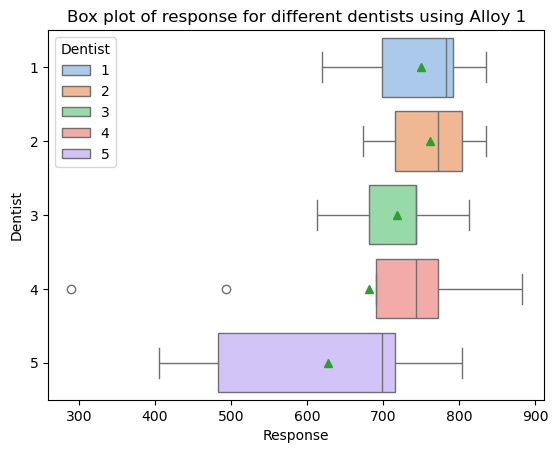

In [35]:
# Study the box plot for each dentist
sns.boxplot(data=df_firstAlloy,x='Response',y='Dentist',showmeans=True, hue='Dentist',palette='pastel')
plt.title('Box plot of response for different dentists using Alloy 1')
plt.show()

#### Assumptions

In [36]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_firstAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 1.1945308699072215e-05


In [37]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_firstAlloy['Response'][df_firstAlloy['Dentist']==1], 
                            df_firstAlloy['Response'][df_firstAlloy['Dentist']==2], 
                            df_firstAlloy['Response'][df_firstAlloy['Dentist']==3],
                           df_firstAlloy['Response'][df_firstAlloy['Dentist']==4],
                           df_firstAlloy['Response'][df_firstAlloy['Dentist']==5])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.2565537418543795


Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### ANOVA test

In [38]:
# One-way ANOVA test
test_stat, p_value = f_oneway(df_firstAlloy.loc[df_firstAlloy['Dentist'] == 1, 'Response'],
                              df_firstAlloy.loc[df_firstAlloy['Dentist'] == 2, 'Response'],
                              df_firstAlloy.loc[df_firstAlloy['Dentist'] == 3, 'Response'],
                             df_firstAlloy.loc[df_firstAlloy['Dentist'] == 4, 'Response'],
                             df_firstAlloy.loc[df_firstAlloy['Dentist'] == 5, 'Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.11656712140267628


The p-value of 0.1166 is greater than 0.05. We fail to reject the null hypothesis. The response is the same for all the dentists.

### Alloy 2

In [39]:
# Check the distribution of dentists
df_secondAlloy['Dentist'].value_counts()

Dentist
1    9
2    9
3    9
4    9
5    9
Name: count, dtype: int64

Let's write the null and alternative hypothesis for Alloy 2

Let $\mu_1, \mu_2, \mu_3, \mu_4, \mu_5$ be the means of response for the different dentists.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$

against the alternative hypothesis

>$H_a: $ At least one response is different from the rest.

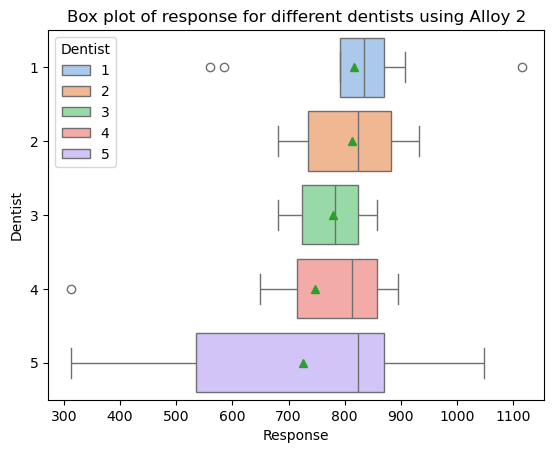

In [40]:
# Study the box plot for each dentist
sns.boxplot(data=df_secondAlloy,x='Response',y='Dentist',showmeans=True, hue='Dentist',palette='pastel')
plt.title('Box plot of response for different dentists using Alloy 2')
plt.show()

#### Assumptions

In [41]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_secondAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 0.00040293129942514585


In [42]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_secondAlloy['Response'][df_secondAlloy['Dentist']==1], 
                            df_secondAlloy['Response'][df_secondAlloy['Dentist']==2], 
                            df_secondAlloy['Response'][df_secondAlloy['Dentist']==3],
                           df_secondAlloy['Response'][df_secondAlloy['Dentist']==4],
                           df_secondAlloy['Response'][df_secondAlloy['Dentist']==5])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.23686777576324952


Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### One-way ANOVA test

In [43]:
# One-way ANOVA test
test_stat, p_value = f_oneway(df_secondAlloy.loc[df_secondAlloy['Dentist'] == 1, 'Response'],
                              df_secondAlloy.loc[df_secondAlloy['Dentist'] == 2, 'Response'],
                              df_secondAlloy.loc[df_secondAlloy['Dentist'] == 3, 'Response'],
                             df_secondAlloy.loc[df_secondAlloy['Dentist'] == 4, 'Response'],
                             df_secondAlloy.loc[df_secondAlloy['Dentist'] == 5, 'Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.7180309510793431


The p-value of 0.718 is greater than 0.05. We fail to reject the null hypothesis. The response is the same for all the dentists.

## 4.2 How does the hardness of implants vary depending on methods?

### Alloy 1

In [44]:
# Check the distribution of dentists
df_firstAlloy['Method'].value_counts()

Method
1    15
2    15
3    15
Name: count, dtype: int64

Let's write the null and alternative hypothesis for Alloy 1

Let $\mu_1, \mu_2, \mu_3$ be the means of response for the different methods.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one response is different from the rest.

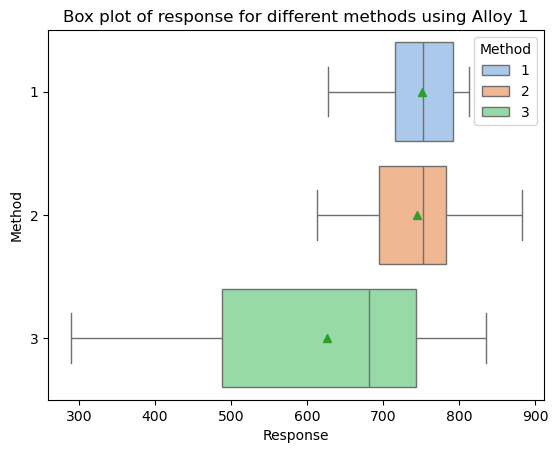

In [45]:
# Study the box plot for each method
sns.boxplot(data=df_firstAlloy,x='Response',y='Method',showmeans=True, hue='Method',palette='pastel')
plt.title('Box plot of response for different methods using Alloy 1')
plt.show()

#### Assumptions

In [46]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_firstAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 1.1945308699072215e-05


In [47]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_firstAlloy['Response'][df_firstAlloy['Method']==1], 
                            df_firstAlloy['Response'][df_firstAlloy['Method']==2], 
                            df_firstAlloy['Response'][df_firstAlloy['Method']==3])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.0034160381460233975


#### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - No! The Levene test indicates that there is no homogeneity of variance. However, we will still proceed with the ANOVA.

#### One-way ANOVA test

In [48]:
# One-way ANOVA test
test_stat, p_value = f_oneway(df_firstAlloy.loc[df_firstAlloy['Method'] == 1, 'Response'],
                              df_firstAlloy.loc[df_firstAlloy['Method'] == 2, 'Response'],
                              df_firstAlloy.loc[df_firstAlloy['Method'] == 3, 'Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.004163412167505543


The p-value of 0.0042 is less than 0.05. We reject the null hypothesis. The response is not the same for all the methods.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests would be used to test the differences between all pairs of means.

#### Multiple Comparison test (Tukey HSD)

In order to identify for which method the mean response is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [49]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_firstAlloy['Response'], groups = df_firstAlloy['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


#### Insight

The above table indicates that the mean response is similar for method 1 and method 2. However, the mean response for method 3 is different from both method1 and method 2.

### Alloy 2

In [50]:
# Check the distribution of dentists
df_secondAlloy['Method'].value_counts()

Method
1    15
2    15
3    15
Name: count, dtype: int64

Let's write the null and alternative hypothesis for Alloy 2

Let $\mu_1, \mu_2, \mu_3$ be the means of response for the different methods.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one response is different from the rest.

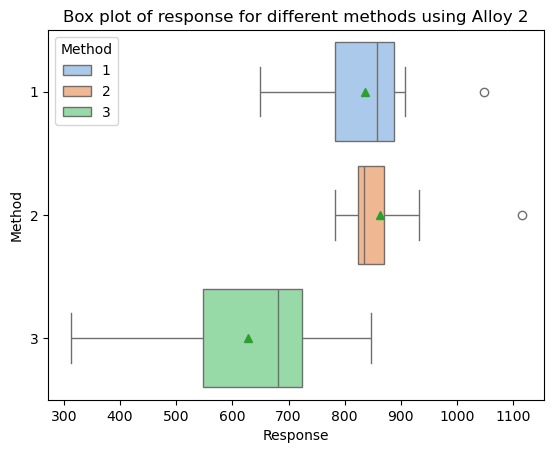

In [51]:
# Study the box plot for each dentist
sns.boxplot(data=df_secondAlloy,x='Response',y='Method',showmeans=True, hue='Method',palette='pastel')
plt.title('Box plot of response for different methods using Alloy 2')
plt.show()

#### Assumptions

In [52]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_secondAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 0.00040293129942514585


In [53]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_secondAlloy['Response'][df_secondAlloy['Method']==1], 
                            df_secondAlloy['Response'][df_secondAlloy['Method']==2], 
                            df_secondAlloy['Response'][df_secondAlloy['Method']==3])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.04469269939158668


Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - No! The Levene test indicates that there is no homogeneity of variance. However, we will still proceed with the ANOVA.

#### One-way ANOVA test

In [54]:
# One-way ANOVA test
test_stat, p_value = f_oneway(df_secondAlloy.loc[df_secondAlloy['Method'] == 1, 'Response'],
                              df_secondAlloy.loc[df_secondAlloy['Method'] == 2, 'Response'],
                              df_secondAlloy.loc[df_secondAlloy['Method'] == 3, 'Response'])
print('The p-value is ' + str(p_value))

The p-value is 5.415871051443187e-06


The p-value of 5.4e-6 is less than 0.05. We reject the null hypothesis. The response is not the same for all the methods.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests would be used to test the differences between all pairs of means.

#### Multiple Comparison test (Tukey HSD)

In order to identify for which method the mean response is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [55]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_secondAlloy['Response'], groups = df_secondAlloy['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


#### Insight

The above table indicates that the mean response is similar for method 1 and method 2. However, the mean response for method 3 is different from both method1 and method 2.

## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

### Alloy 1

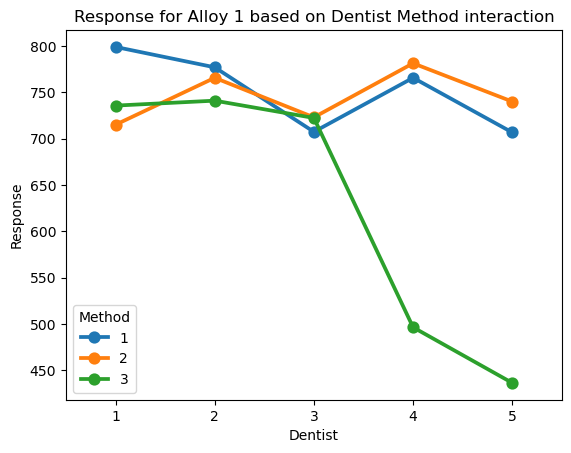

In [56]:
sns.pointplot(x='Dentist', y='Response', data=df_firstAlloy, hue='Method', errorbar=None)
plt.title('Response for Alloy 1 based on Dentist Method interaction')
plt.show()

* Method 1: The response value does not vary a lot between dentists. 
* Method 2: The response value does not vary a lot between dentists.
* Method 3: The response value is high for dentists 1, 2 and 3. It drops significantly for dentists 4 and 5.
* We have already established that the mean response is different for Method 3. The above graph indicates that only dentists 4 and 5 contribute to this difference.  

### Alloy 2

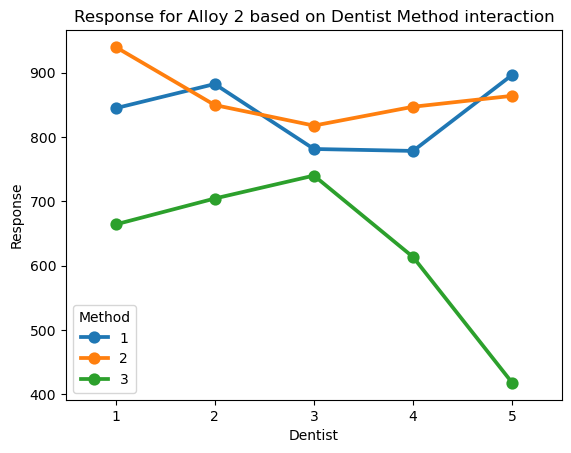

In [57]:
sns.pointplot(x='Dentist', y='Response', data=df_secondAlloy, hue='Method', errorbar=None)
plt.title('Response for Alloy 2 based on Dentist Method interaction')
plt.show()

* Method 1: The response value does not vary a lot between dentists. 
* Method 2: The response value does not vary a lot between dentists.
* Method 3: The response value is high for dentists 1, 2 and 3. It drops a little bit for dentist 4 and a lot for dentist 5.
* We have already established that the mean response is different for Method 3. The above graph indicates that only dentists 4 and 5 contribute to this difference.  

## 4.4 How does the hardness of implants vary depending on dentists and methods together?

### Alloy 1

Let's write the null and alternative hypothesis for Alloy 1

For the interaction between dentists and methods,

We will test the null hypothesis

>$H_0: $ There is no interaction effect.

against the alternative hypothesis

>$H_a: $ An interaction effect exists.

#### Assumptions

In [58]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_firstAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 1.1945308699072215e-05


In [59]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_firstAlloy['Response'][(df_firstAlloy['Method']==1) & (df_firstAlloy['Dentist']==1)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==2) & (df_firstAlloy['Dentist']==1)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==3) & (df_firstAlloy['Dentist']==1)],
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==1) & (df_firstAlloy['Dentist']==2)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==2) & (df_firstAlloy['Dentist']==2)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==3) & (df_firstAlloy['Dentist']==2)],
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==1) & (df_firstAlloy['Dentist']==3)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==2) & (df_firstAlloy['Dentist']==3)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==3) & (df_firstAlloy['Dentist']==3)],
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==1) & (df_firstAlloy['Dentist']==4)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==2) & (df_firstAlloy['Dentist']==4)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==3) & (df_firstAlloy['Dentist']==4)],
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==1) & (df_firstAlloy['Dentist']==5)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==2) & (df_firstAlloy['Dentist']==5)], 
                            df_firstAlloy['Response'][(df_firstAlloy['Method']==3) & (df_firstAlloy['Dentist']==5)]
                           )
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3128166652989495


Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### n-way ANOVA

In [60]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Method):C(Dentist)'
model1 = ols(formula, df_firstAlloy).fit()
aov_table_alloy1 = anova_lm(model1)
print(aov_table_alloy1)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Method):C(Dentist)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


Insight

* The p-value for the interaction is 0.0068, which is less than 0.05. The null hypothesis is rejected. This concludes that there is an interaction between methods and dentists when alloy 1 is used.

### Alloy 2

Let's write the null and alternative hypothesis for Alloy 2

For the interaction between dentists and methods,

We will test the null hypothesis

>$H_0: $ There is no interaction effect.

against the alternative hypothesis

>$H_a: $ An interaction effect exists.

#### Assumptions

In [61]:
# Normality test using Shapiro-Wilk
w, p_value = stats.shapiro(df_secondAlloy['Response']) 
print('The p-value is', p_value)

The p-value is 0.00040293129942514585


In [62]:
# Homogeneity of variance using levene test
statistic, p_value = levene( df_secondAlloy['Response'][(df_secondAlloy['Method']==1) & (df_secondAlloy['Dentist']==1)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==2) & (df_secondAlloy['Dentist']==1)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==3) & (df_secondAlloy['Dentist']==1)],
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==1) & (df_secondAlloy['Dentist']==2)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==2) & (df_secondAlloy['Dentist']==2)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==3) & (df_secondAlloy['Dentist']==2)],
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==1) & (df_secondAlloy['Dentist']==3)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==2) & (df_secondAlloy['Dentist']==3)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==3) & (df_secondAlloy['Dentist']==3)],
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==1) & (df_secondAlloy['Dentist']==4)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==2) & (df_secondAlloy['Dentist']==4)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==3) & (df_secondAlloy['Dentist']==4)],
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==1) & (df_secondAlloy['Dentist']==5)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==2) & (df_secondAlloy['Dentist']==5)], 
                            df_secondAlloy['Response'][(df_secondAlloy['Method']==3) & (df_secondAlloy['Dentist']==5)]
                           )
# find the p-value
print('The p-value is', p_value)

The p-value is 0.7831735515657826


Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - No! Shapiro-Wilk's test indicates that the distribution is not normal. However, we will still proceed with the ANOVA.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### n-way ANOVA test

In [63]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Method):C(Dentist)'
model2 = ols(formula, df_secondAlloy).fit()
aov_table_alloy2 = anova_lm(model2)
print(aov_table_alloy2)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Method):C(Dentist)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


Insight

* The p-value for the interaction is 0.0932, which is greater than 0.05. Here we fail to reject the null hypothesis. This concludes that there is no interaction effect between methods and dentists when alloy 2 is used.
* Visually, the interaction plot indicates the response for dentist 5 using method 3 is very different from the rest of the values. The p-value of 0.0932 indicates that we are 90% sure of it. However, since we have set the level of significant at 95%, our evidence is not strong enough to suggest this interaction.

# Additional section to study the effect of temperature

## Effect of temperature: Alloy 1

Let us consider the effect of temperature.

* The null hypothesis would be that the mean response is the same at all temperatures.
* The alternate is that the mean response is different at different temperatures.

In [64]:
formula = 'Response ~ C(Dentist) + C(Method) + Temp + C(Method):C(Dentist)'
model1 = ols(formula, df_firstAlloy).fit()
aov_table_alloy1 = anova_lm(model1)
print(aov_table_alloy1)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.964480  0.010972
C(Method)              2.0  148472.177778  74236.088889  11.034769  0.000273
C(Method):C(Dentist)   8.0  185941.377778  23242.672222   3.454890  0.006495
Temp                   1.0   10083.333333  10083.333333   1.498830  0.230705
Residual              29.0  195096.666667   6727.471264        NaN       NaN


* The p-value corresponding to temperature is 0.23 which is greater than 0.05. We fail to reject the null hypothesis. There is not enough statistical evidence to suggest that the mean response is different at different temperatures for alloy 1.
* When comparing the results from the table without Temp in the formula, the p-values for Dentist, Method and Dentist:Method interaction have not changed much. This further strengths the fact that temperature does not play a role. 

## Effect of temperature: Alloy 2

Let us consider the effect of temperature.

* The null hypothesis would be that the mean response is the same at all temperatures.
* The alternate is that the mean response is different at different temperatures.

In [65]:
formula = 'Response ~ C(Dentist) + C(Method) + Temp + C(Method):C(Dentist)'
model2 = ols(formula, df_secondAlloy).fit()
aov_table_alloy2 = anova_lm(model2)
print(aov_table_alloy2)

                        df         sum_sq        mean_sq          F  \
C(Dentist)             4.0   56797.911111   14199.477778   1.378089   
C(Method)              2.0  499640.400000  249820.200000  24.245571   
C(Method):C(Dentist)   8.0  197459.822222   24682.477778   2.395486   
Temp                   1.0   86296.033333   86296.033333   8.375210   
Residual              29.0  298808.633333   10303.745977        NaN   

                            PR(>F)  
C(Dentist)            2.659183e-01  
C(Method)             6.465709e-07  
C(Method):C(Dentist)  4.055421e-02  
Temp                  7.151268e-03  
Residual                       NaN  


* The p-value corresponding to temperature is 7.15e-3 which is less than 0.05. We reject the null hypothesis. The mean response is different at different temperatures for alloy 2.
* When comparing the results from the table without Temp in the formula, the p-values for Dentist, Method and Dentist:Method interaction have all reduced to the point where the response depends on dentists, methods and their interaction! 

## Another approach to interaction plot

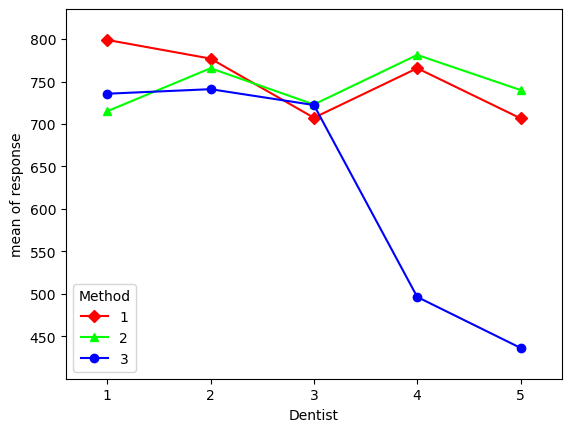

In [71]:
#Alloy 1
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot( np.array(df_firstAlloy['Dentist']), np.array(df_firstAlloy['Method']), np.array(df_firstAlloy['Response']), markers=['D','^','o'], xlabel='Dentist', legendtitle='Method')

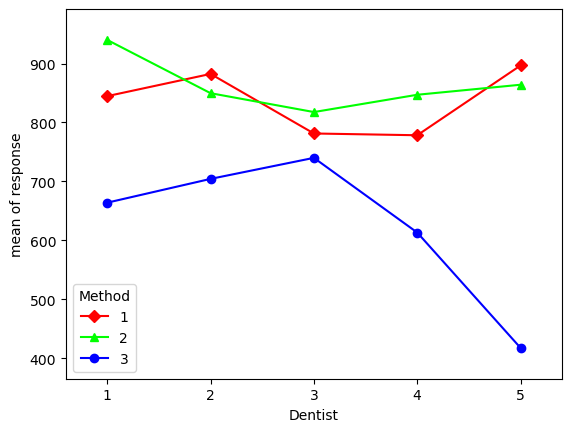

In [72]:
# Interaction plot
interaction_plot(np.array(df_secondAlloy['Dentist']),np.array(df_secondAlloy['Method']),np.array(df_secondAlloy['Response']),markers=['D','^','o'], xlabel='Dentist', legendtitle='Method')